# Submission Akhir: Students' Performance

- Nama: Halim Sajidi
- Email: halimsajidi14@gmail.com
- Id Dicoding: halimsajidi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# evaluasi model
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score

# deploy
from joblib import dump, load


### Menyiapkan data yang akan digunankan

In [279]:
df = pd.read_csv('data.csv')
df

,Marital_status;Application_mode;Application_order;Course;Daytime_evening_attendance;Previous_qualification;Previous_qualification_grade;Nacionality;Mothers_qualification;Fathers_qualification;Mothers_occupation;Fathers_occupation;Admission_grade;Displaced;Educational_special_needs;Debtor;Tuition_fees_up_to_date;Gender;Scholarship_holder;Age_at_enrollment;International;Curricular_units_1st_sem_credited;Curricular_units_1st_sem_enrolled;Curricular_units_1st_sem_evaluations;Curricular_units_1st_sem_approved;Curricular_units_1st_sem_grade;Curricular_units_1st_sem_without_evaluations;Curricular_units_2nd_sem_credited;Curricular_units_2nd_sem_enrolled;Curricular_units_2nd_sem_evaluations;Curricular_units_2nd_sem_approved;Curricular_units_2nd_sem_grade;Curricular_units_2nd_sem_without_evaluations;Unemployment_rate;Inflation_rate;GDP;Status
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...
...,...
4419,1;1;6;9773;1;1;125.0;1;1;1;5;4;122.2;0;0;0;1;1...
4420,1;1;2;9773;1;1;120.0;105;1;1;9;9;119.0;1;0;1;0...
4421,1;1;1;9500;1;1;154.0;1;37;37;9;9;149.5;1;0;0;1...
4422,1;1;1;9147;1;1;180.0;1;37;37;7;4;153.8;1;0;0;1...


Dataset perlu dipisahkan sesuai dengan kolomnya

In [280]:
df.head(1).values

array([['1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1;1;0;20;0;0;0;0;0;0.0;0;0;0;0;0;0.0;0;10.8;1.4;1.74;Dropout']],
      dtype=object)

Dengan menggunakan argumen sep=';' untuk mengindikasikan bahwa data dipisahkan dengan titik koma.

In [281]:
# Membaca file CSV dengan pemisah titik koma
df = pd.read_csv('data.csv', sep=';')

df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [282]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

## Data Understanding

### Deskripsi Variabel

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dataset yang digunakan adalah tentang performa murid dengan jumlah data sebanyak 4424 baris dan 37 kolom yang terbagi menjadi 36 kolom independen yang akan digunakan untuk melatih model dan 1 kolom yaitu kolom Status sebagai targetnya.

In [284]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [285]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

**Kolom kategorik**

In [286]:
df_cat = df.select_dtypes(include="object")
cat_col = df_cat.columns
df_cat.head(5)

,Status
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


**Kolom Numerik**

In [287]:
df_num = df.select_dtypes(include=["int64", "float64"])
num_col = df_num.columns
df_num.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


### Menangani Missing Value

In [288]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Dapat dilihat pada dataset ini tidak terdapat missing value sama sekali jadi untuk tahap ini bisa di skip dan langsung ke tahap berikutnya.

### Menangani Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

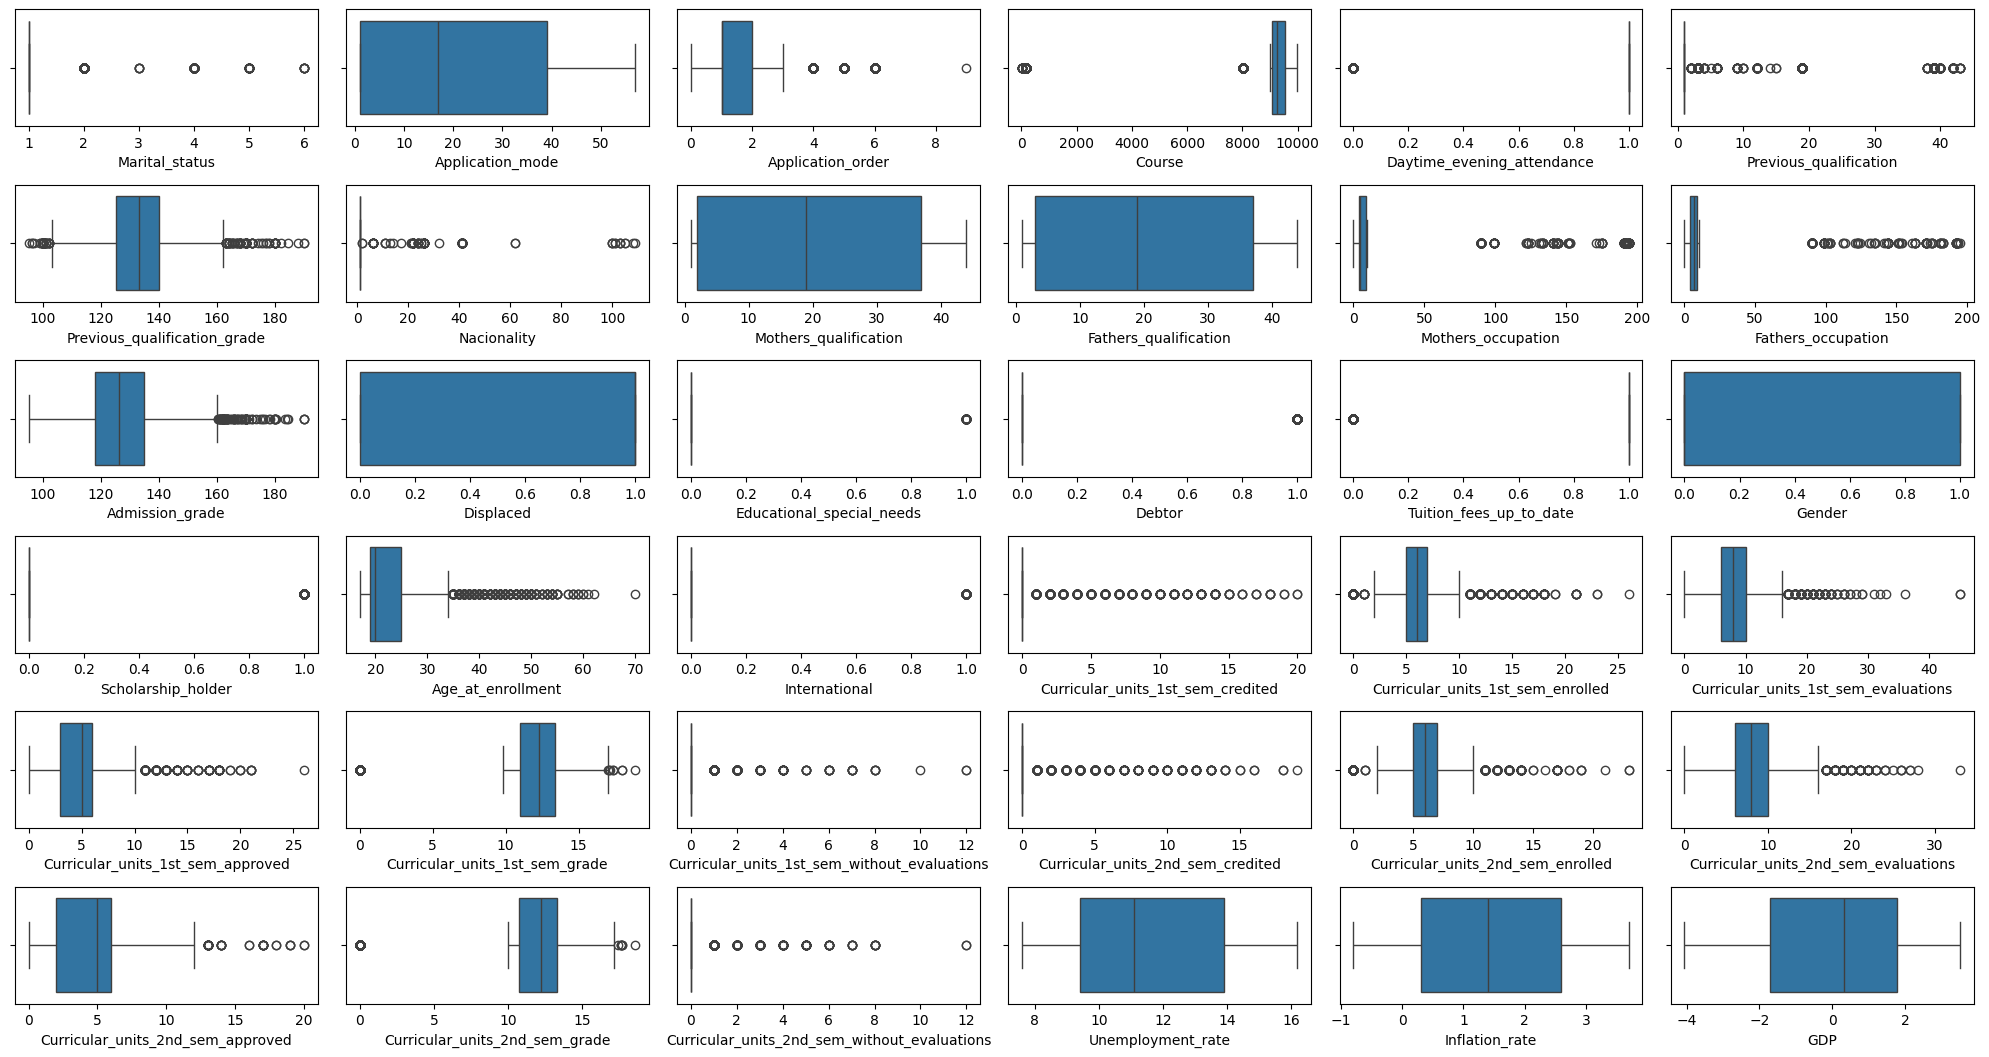

In [289]:
plt.figure(figsize=(20, 12))

# Calculate the number of rows and columns needed for the subplots
num_rows = 7
num_cols = 6

for i, column in enumerate(num_col, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df, x=df[column])
    plt.tight_layout()

Berdasarkan visualisasi di atas, terlihat adanya outlier pada beberapa kolom. Namun, mengetahui keberadaan outlier tidak serta-merta berarti outlier tersebut harus dihapus atau diganti. Setiap data pada kolom tersebut dianggap masuk akal dan sesuai dengan konteksnya, sehingga tidak perlu dilakukan perubahan terhadap outlier tersebut.

 Tetapi khusus untuk kolom Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_grade diperlukan visualsasi lebih lanjut

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


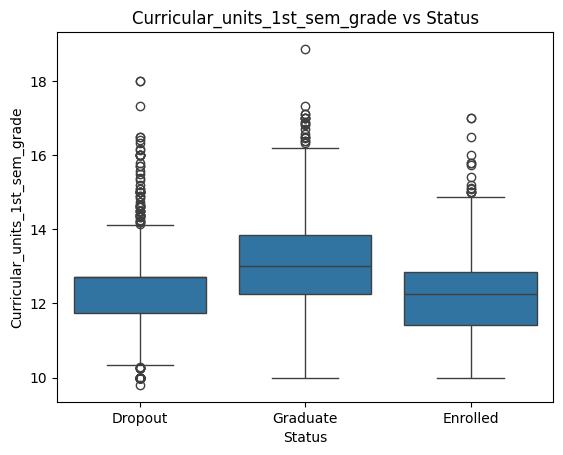

In [290]:
# Visualisasi Status berdasarkan usia
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df_new)
plt.title('Curricular_units_1st_sem_grade vs Status')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


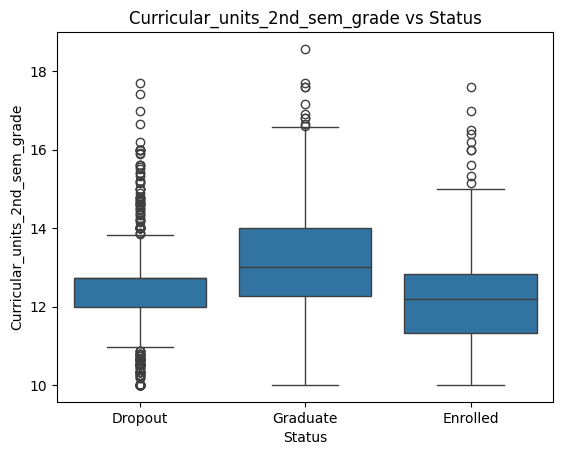

In [291]:
# Visualisasi Status berdasarkan usia
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df_new)
plt.title('Curricular_units_2nd_sem_grade vs Status')
plt.show()


Dapat dilihat terdapat nilai 0 pada graduate, hal ini tidak masuk akal seharusnya rata-rata nilai siswa yang berstatus graduate tidak boleh 0, sehingga nilai 0 ini dianggap sebagai outlier dan harus dihapus.

In [292]:
# Mengisi nilai 0 pada kolom 'Curricular_units_1st_sem_grade' dan 'Curricular_units_2nd_sem_grade' dengan rata-rata
df['Curricular_units_1st_sem_grade'].replace(0, np.nan, inplace=True)
df['Curricular_units_2nd_sem_grade'].replace(0, np.nan, inplace=True)

df['Curricular_units_1st_sem_grade'].fillna(df['Curricular_units_1st_sem_grade'].mean(), inplace=True)
df['Curricular_units_2nd_sem_grade'].fillna(df['Curricular_units_2nd_sem_grade'].mean(), inplace=True)


<ipython-input-292-2ac7594eafa8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Curricular_units_1st_sem_grade'].replace(0, np.nan, inplace=True)
<ipython-input-292-2ac7594eafa8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

## Data Visualisation

### Distribusi Status

In [293]:
df_new = df.copy()

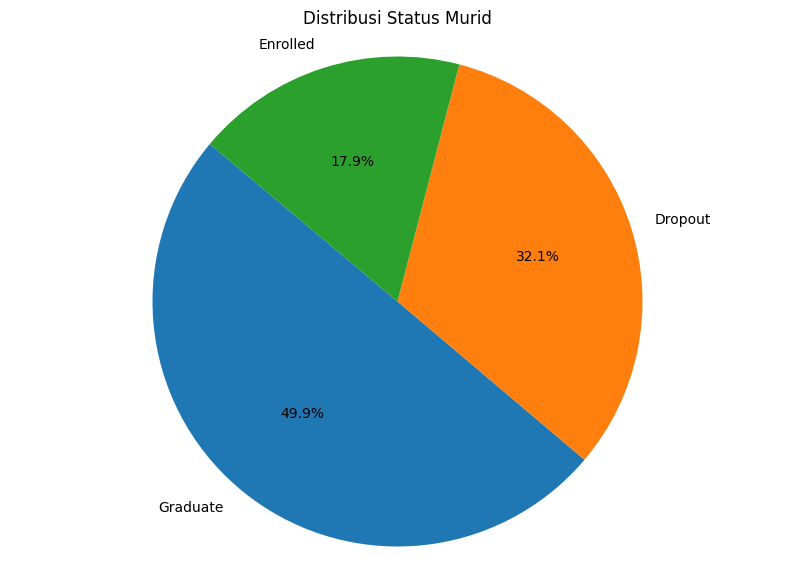

In [294]:
status_cnt = df['Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(status_cnt, labels=status_cnt.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Status Murid')
plt.axis('equal')
plt.show()

Berdasarkan plot pie chart di atas menunjukkan bahwa proporsi murid graduate sebesar 49.9% dengan jumlah murid yang dropout cukup banyak yaitu 32.1%

### Hubungan status siswa dengan Jenis Kelamin


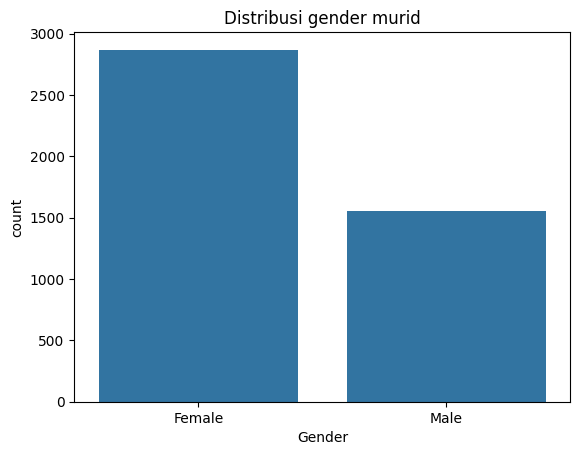

In [295]:
# Visualisasi distribusi gender
sns.countplot(x='Gender', data=df)
plt.title('Distribusi gender murid')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

Jumlah siswa laki-laki lebih sedikit dibandingkan dengan siswa perempuan

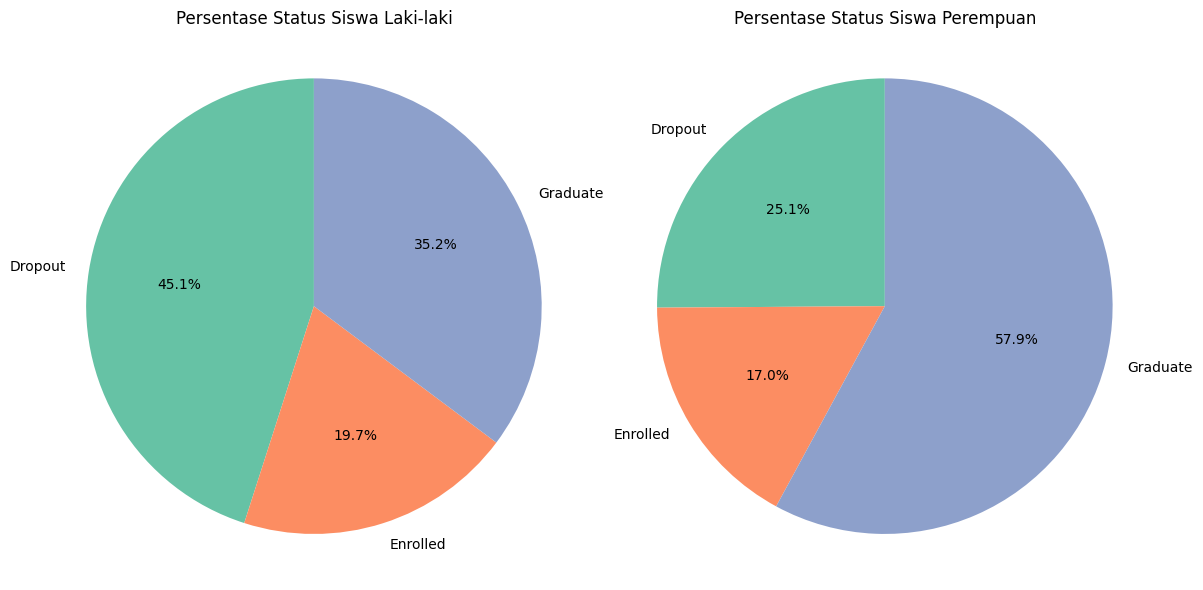

In [296]:
# Menghitung jumlah Status berdasarkan Gender
Status_Gender_counts = df.groupby(['Gender', 'Status']).size().unstack(fill_value=0)

# Membuat figure untuk pie charts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart untuk Male
ax[0].pie(Status_Gender_counts.loc[1],
           labels=Status_Gender_counts.columns,
           autopct='%1.1f%%',
           startangle=90,
           colors=['#66c2a5', '#fc8d62', '#8da0cb'])
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Persentase Status Siswa Laki-laki')

# Pie chart untuk Female
ax[1].pie(Status_Gender_counts.loc[0],
           labels=Status_Gender_counts.columns,
           autopct='%1.1f%%',
           startangle=90,
           colors=['#66c2a5', '#fc8d62', '#8da0cb'])
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title('Persentase Status Siswa Perempuan')

# Menampilkan pie charts
plt.tight_layout()
plt.show()

Berdasarkan plot di atas siswa laki-laki memiliki persen dropout lebih tinggi (45.1%) dibandingkan dengan perempuan (25.1%). Lalu untuk tingkat gradutenya siswa laki-laki memiliki tingkat kelulusan yang rendah (35.2%) di bandingkan perempuan (57.9%).

### Marital status dan Status siswa

In [297]:
Marital_status_mapping = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated',
}

# Ganti angka dengan nama Marital_status
df_new['Marital_status'] = df['Marital_status'].replace(Marital_status_mapping)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


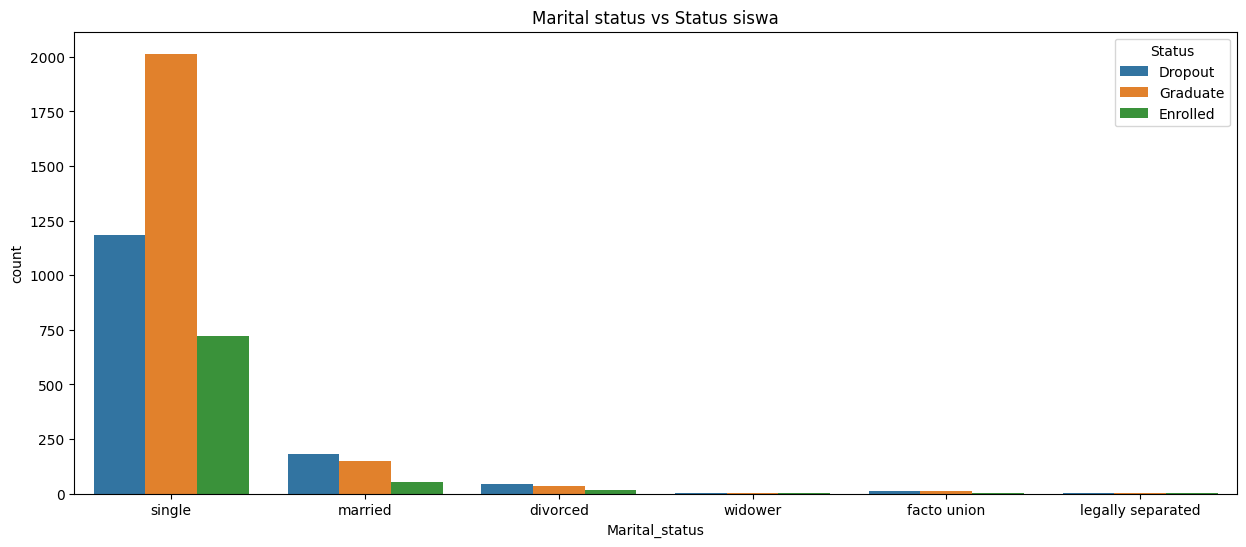

In [298]:
# Visualisasi Status vs Marital_status
plt.figure(figsize=(15,6))
sns.countplot(x='Marital_status', hue='Status', data=df_new)
plt.title('Marital status vs Status siswa')
plt.xticks(rotation=0)
plt.show()

Dapat dilihat bahwa kebanyakan siswa masih status single dan beberapa lainnya sudah menikah atau cerai. Selain itu, siswa yang sudah menikah atau cerai lebih banyak yang dropout dibandingkan graduate.

### Status berdasarkan Usia (Age)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


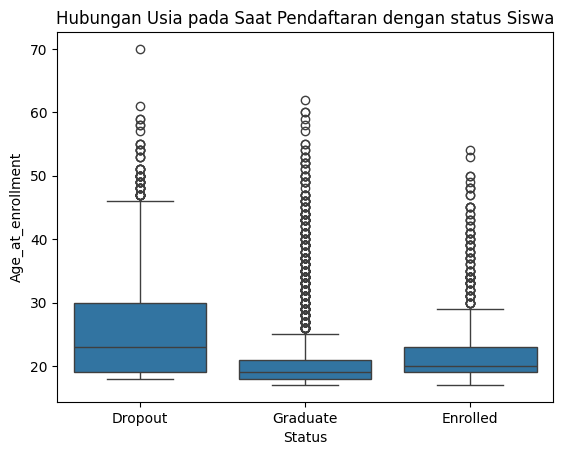

In [299]:
# Visualisasi Status berdasarkan usia
sns.boxplot(x='Status', y='Age_at_enrollment', data=df)
plt.title('Hubungan Usia pada Saat Pendaftaran dengan status Siswa')
plt.show()


Dapat dilihat siswa yang berumur antara 20 sampai 30 tahun pada saat pendaftaran cenderung dropout, dibandingkan dengan siswa yang berumur dibawah 25 tahun.

### Status vs Course

value pada kolom course masih dalam bentuk numerik sehingga dipelukan pengubahan sesuai dengan nama mata kuliahnya

In [300]:
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

# Ganti angka dengan nama course
df_new['Course'] = df['Course'].replace(course_mapping)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


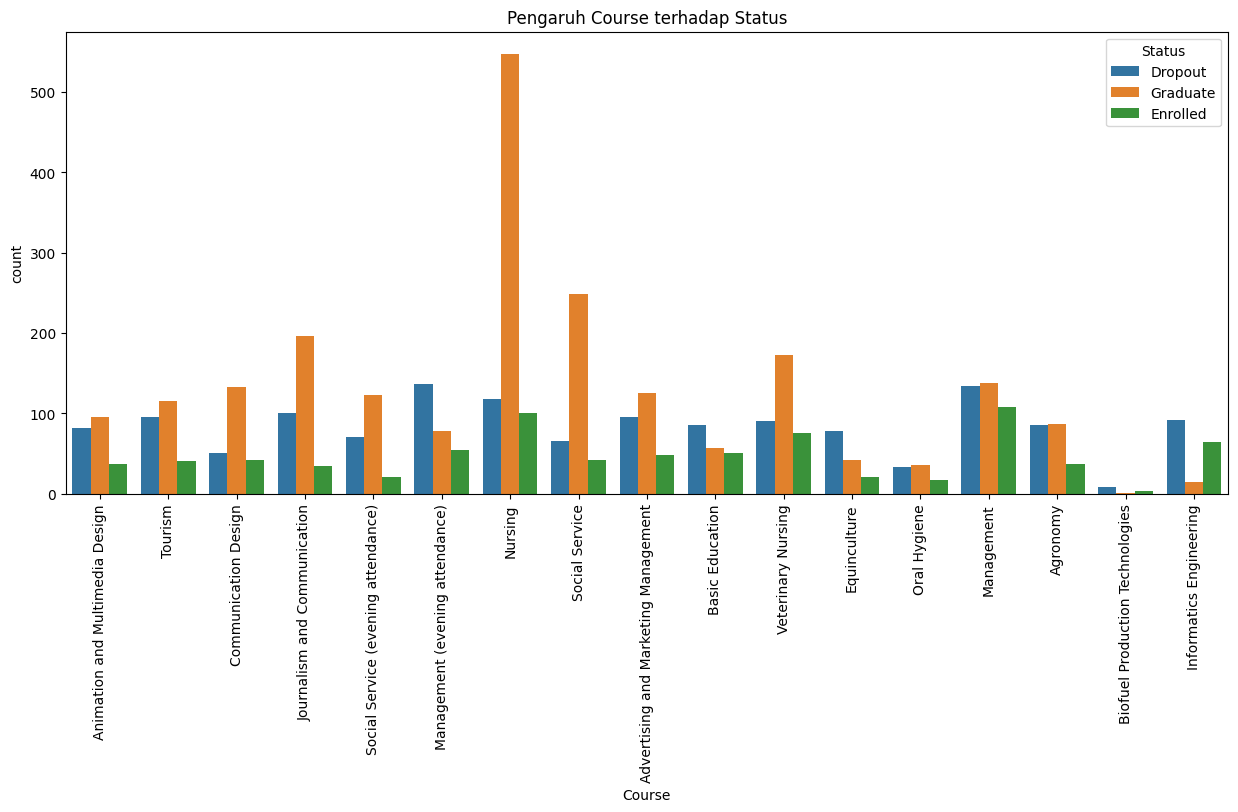

In [301]:
# Visualisasi Status vs Course
plt.figure(figsize=(15,6))
sns.countplot(x='Course', hue='Status', data=df_new)
plt.title('Pengaruh Course terhadap Status')
plt.xticks(rotation=90)
plt.show()

In [302]:
# 1. Top 5 Course Graduate Tertinggi
top_graduate = df_new[df_new['Status'] == 'Graduate'].groupby('Course').size().reset_index(name='Count')
top_graduate = top_graduate.sort_values(by='Count', ascending=False).head(5)

# 2. Top 5 Course Dropout Tertinggi
top_dropout = df_new[df_new['Status'] == 'Dropout'].groupby('Course').size().reset_index(name='Count')
top_dropout = top_dropout.sort_values(by='Count', ascending=False).head(5)

# 3. Top 5 Course Enrolled Tertinggi
top_Enrolled = df_new[df_new['Status'] == 'Enrolled'].groupby('Course').size().reset_index(name='Count')
top_Enrolled = top_Enrolled.sort_values(by='Count', ascending=False).head(5)

In [303]:
# Tampilkan hasil
print("Top 10 Course dengan Graduate Tertinggi:")
top_graduate

Top 10 Course dengan Graduate Tertinggi:


,Course,Count
11,Nursing,548
13,Social Service,248
8,Journalism and Communication,196
16,Veterinary Nursing,172
9,Management,138


In [304]:
print("Top 10 Course dengan Dropout Tertinggi:")
top_dropout

Top 10 Course dengan Dropout Tertinggi:


,Course,Count
10,Management (evening attendance),136
9,Management,134
11,Nursing,118
8,Journalism and Communication,101
15,Tourism,96


In [305]:
print("Top 10 Course dengan Enrolled Tertinggi:")
top_Enrolled

Top 10 Course dengan Enrolled Tertinggi:


,Course,Count
9,Management,108
11,Nursing,100
16,Veterinary Nursing,75
7,Informatics Engineering,64
10,Management (evening attendance),54


Status siswa juga dipengaruhi oleh course yang dijalani, dapat dilihat persebaran data pada grafik diatas sangat beragam, course nursing sendiri memiliki status graduate tertinggi, lalu Management (evening attendance)	dan management memiliki tingkat dropout yang tinggi. Dengan demikian, status siswa dapat dipengaruhi dengan course apa yang dipilih.

### Beasiswa dan Status

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


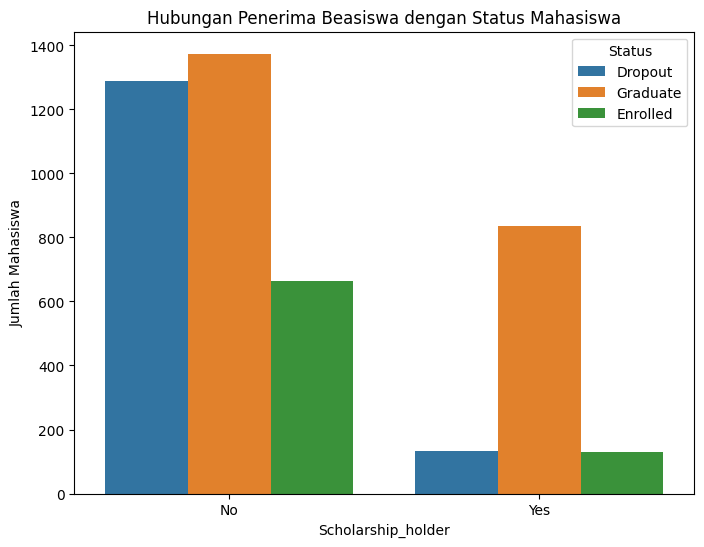

In [306]:
plt.figure(figsize=(8,6))
sns.countplot(x='Scholarship_holder', hue='Status', data=df)
plt.title('Hubungan Penerima Beasiswa dengan Status Mahasiswa')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Jumlah Mahasiswa')
plt.show()

Berdasarkan grafik dia atas, Penerima beasiswa cenderung berstatus graduate dan tidak dropout dibandingkan dengan siswa yang tidak menerima beasiswa.

### The number of curricular units dan Status

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


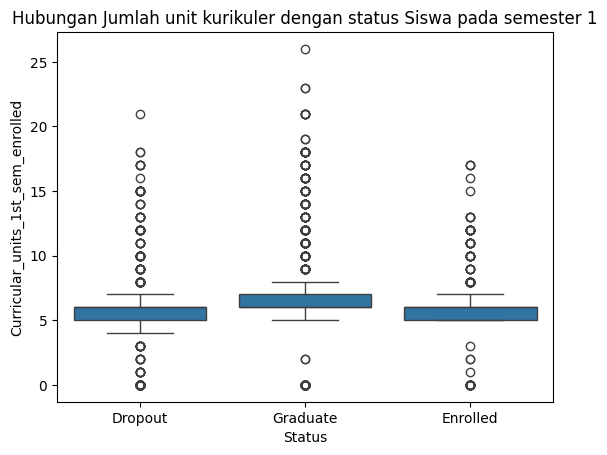

In [307]:

sns.boxplot(x='Status', y='Curricular_units_1st_sem_enrolled', data=df)
plt.title('Hubungan Jumlah unit kurikuler dengan status Siswa pada semester 1')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


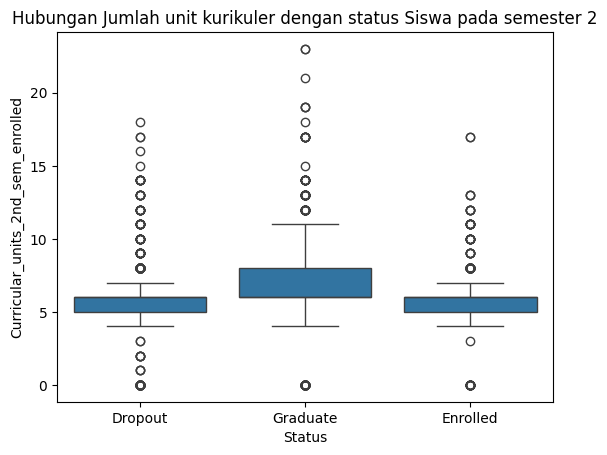

In [308]:

sns.boxplot(x='Status', y='Curricular_units_2nd_sem_enrolled', data=df)
plt.title('Hubungan Jumlah unit kurikuler dengan status Siswa pada semester 2')
plt.show()

Dapat dilihat siswa yang mengambil curricular units lebih banyak cenderung berstatus graduate dibandingkan yang tidak. Terutama siswa yang mengambil lebih dari 20 unit.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


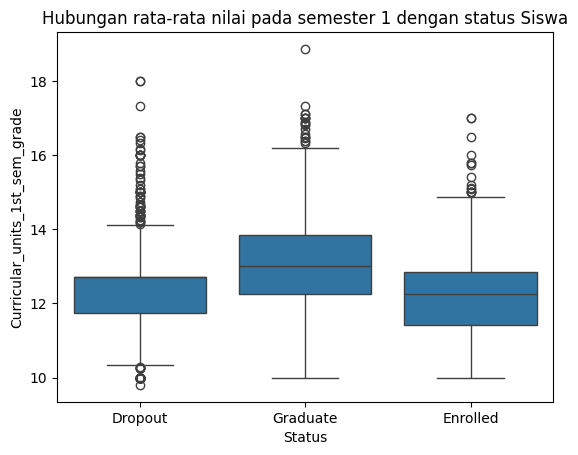

In [309]:
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df_new)
plt.title('Hubungan rata-rata nilai pada semester 1 dengan status Siswa')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


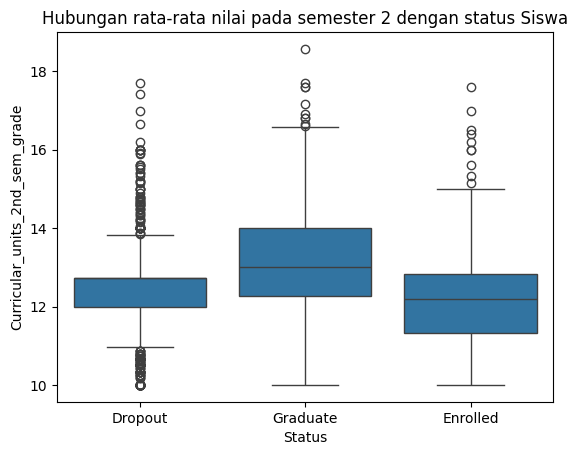

In [310]:
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df_new)
plt.title('Hubungan rata-rata nilai pada semester 2 dengan status Siswa')
plt.show()

Dua grafik di atas menggambarkan bahwa siswa yang mendapat rata-rata grade atau nilai yang tinggi, cenderung berstatus graduate.

## Data Preparation / Preprocessing

### Encoding

Pada tahap ini dilakukan encoding menggunakan label encoder, bertujuan agar data dapat diproses pada saat pengembangan model machine learning.

In [311]:
le = LabelEncoder()

for column in cat_col:
    df[column] = le.fit_transform(df[column])

df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,12.734505,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,12.734505,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


### splitting data

Pembagian data dilakukan agar mendapatkan dataset train dan juga test dengan proporsi 80% dan 20%

In [312]:
X = df.drop(columns=['Status'])
y = df['Status']

In [313]:
X.head(5).to_csv('test.csv', index=False)

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train', X_train.shape)  #Printing the X_train Features Shape
print('y_train', y_train.shape)  #Printing the y_train Labels Shape
print('X_test', X_test.shape)    #Printing the X_test Features Shape
print('y_test', y_test.shape)    #Printing the y_test Labels  Shape

X_train (3539, 36)
y_train (3539,)
X_test (885, 36)
y_test (885,)


## Modeling

Tahap ini dilakukan pengembangan model machine learning dengan tujuan untuk memprediksi karyawan yang tetap tinggal di perusahaan atau melakukan resign.

Setiap baseline model yang dikembangkan, diberikan random_state. random_state digunakan sebagai pengontrol pengacakan yang diterapkan pada data sebelum melakukan pemisahan.

### Logistic Regression

**Keunggulan:**
- Sederhana dan mudah diinterpretasikan
- Kecepatan dan efisiensi
- Multicollinearity Handling: Dapat menangani multicollinearity menggunakan regularization (L1 atau L2).

**Kekurangan:**
- Kinerja terbatas pada masalah kompleks
- Kurang efektif untuk outlier

In [315]:
# melakukan training model
lr = LogisticRegression(random_state=24)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=24)

In [316]:
# Predicting the X_test
pred = lr.predict(X_test)

# Testing the model accuracy with different parameters
acc = accuracy_score(y_test, pred)  # Getting the Accuracy Score
f1 = f1_score(y_test, pred, average='macro')  # Getting the F1 Score for multiclass
rec = recall_score(y_test, pred, average='macro')  # Getting the Recall Score for multiclass
prec = precision_score(y_test, pred, average='macro')  # Getting the Precision Score for multiclass
cm_lr = confusion_matrix(y_test, pred)  # Getting the confusion Matrix

# Defining a DataFrame
results = pd.DataFrame([['LogisticRegression', acc, f1, rec, prec]],
                           columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.655367,0.497022,0.521812,0.558848


### Random Forest

**Keunggulan:**
- Dapat menangani data non-linear: Random Forest dapat menangani hubungan kompleks antar fitur tanpa perlu membuat asumsi linearitas.
-Overfitting Resistance: Dengan menggabungkan banyak decision tree, Random Forest cenderung tidak overfitting.
- Fitur penting: Random Forest menyediakan cara untuk mengevaluasi fitur mana yang paling berpengaruh melalui feature importance.

**Kekurangan:**
- Waktu komputasi: Lebih lambat untuk dilatih dibandingkan model yang lebih sederhana, terutama pada dataset yang besar.
- Kurang interpretasi: Meskipun memberikan hasil yang baik, interpretasi model ini sulit dibandingkan model linear.

In [317]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [318]:
# Membuat prediksi pada X_test
pred = rf.predict(X_test)

# Menghitung metrik evaluasi
acc = accuracy_score(y_test, pred)  # Menghitung Accuracy
f1 = f1_score(y_test, pred, average='macro')  # Menghitung F1 Score (multiclass)
rec = recall_score(y_test, pred, average='macro')  # Menghitung Recall (multiclass)
prec = precision_score(y_test, pred, average='macro')  # Menghitung Precision (multiclass)
cm_rf = confusion_matrix(y_test, pred)  # Menghitung Confusion Matrix

# Menyimpan hasil evaluasi dalam DataFrame
model_results = pd.DataFrame([['Random Forest', acc, f1, rec, prec]],
                             columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Menggabungkan hasil evaluasi ke dalam DataFrame `results`
results = pd.concat([results, model_results], ignore_index=True)

# Menampilkan hasil
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.655367,0.497022,0.521812,0.558848
1,Random Forest,0.761582,0.670714,0.663605,0.700006


###  Support Vector Machine (SVM)

**Keunggulan:**
- Kinerja tinggi pada data kecil: SVM sering bekerja dengan sangat baik untuk dataset dengan ukuran kecil hingga menengah.
- Mengatasi masalah non-linear: Kernel trick memungkinkan SVM untuk mengatasi masalah klasifikasi non-linear.
- Overfitting minimal: Karena SVM memaksimalkan margin antara kelas, model ini cenderung menghindari overfitting, terutama pada data dengan high dimensionality.

**Kekurangan:**
- Lambat pada dataset besar: Waktu komputasi dan kebutuhan memori meningkat pesat seiring dengan ukuran dataset.
- Pemilihan kernel: Memilih kernel yang tepat (linear, polynomial, RBF, dsb.) bisa menjadi tantangan dan memerlukan banyak eksperimen.

In [319]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [320]:
# Making predictions on X_test
pred = svm.predict(X_test)

# Calculating evaluation metrics
acc = accuracy_score(y_test, pred)  # Calculating Accuracy
f1 = f1_score(y_test, pred, average='macro')  # Calculating F1 Score (multiclass)
rec = recall_score(y_test, pred, average='macro')  # Calculating Recall (multiclass)
prec = precision_score(y_test, pred, average='macro')  # Calculating Precision (multiclass)
cm_svm = confusion_matrix(y_test, pred)  # Calculating Confusion Matrix

# Storing evaluation results in a DataFrame
model_results = pd.DataFrame([['SVM', acc, f1, rec, prec]],
                             columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Combining evaluation results into the `results` DataFrame
results = pd.concat([results, model_results], ignore_index=True)

# Displaying the results
results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.655367,0.497022,0.521812,0.558848
1,Random Forest,0.761582,0.670714,0.663605,0.700006
2,SVM,0.472316,0.213865,0.333333,0.157439


### XGBoost

**Keunggulan:**
- Kinerja tinggi: Sangat efektif dalam menghasilkan hasil yang baik pada data yang kompleks. Model ini sering kali menghasilkan akurasi lebih tinggi dibandingkan metode lain.
- Flexibilitas: Mendukung banyak fungsi loss dan dapat digunakan untuk masalah klasifikasi, regresi, dan ranking.
- Regularisasi: Gradient boosting (seperti XGBoost) memiliki mekanisme regularisasi bawaan yang membantu mencegah overfitting.

**Kekurangan:**
- Waktu pelatihan: Membutuhkan waktu pelatihan yang lebih lama, terutama pada dataset yang besar.
- Overfitting: Jika tidak dikontrol dengan baik, model ini bisa rentan terhadap overfitting, terutama pada data kecil.

In [321]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [322]:
# Membuat prediksi pada X_test
pred = xgb.predict(X_test)

# Menghitung metrik evaluasi
acc = accuracy_score(y_test, pred)  # Menghitung Accuracy
f1 = f1_score(y_test, pred, average='macro')  # Menghitung F1 Score (multiclass)
rec = recall_score(y_test, pred, average='macro')  # Menghitung Recall (multiclass)
prec = precision_score(y_test, pred, average='macro')  # Menghitung Precision (multiclass)
cm_xgb = confusion_matrix(y_test, pred)  # Menghitung Confusion Matrix

# Menyimpan hasil evaluasi dalam DataFrame
model_results = pd.DataFrame([['XGBoost', acc, f1, rec, prec]],
                             columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# Menggabungkan hasil evaluasi ke dalam DataFrame `results`
results = pd.concat([results, model_results], ignore_index=True)

# Menampilkan hasil
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.655367,0.497022,0.521812,0.558848
1,Random Forest,0.761582,0.670714,0.663605,0.700006
2,SVM,0.472316,0.213865,0.333333,0.157439
3,XGBoost,0.769492,0.700101,0.692128,0.717094


## Evaluation

Metrik yang digunakan untuk mengevaluasi model adalah Akurasi, Precision, Recall, dan F1-Score. Metrik ini dipilih karena sesuai dengan kebutuhan yaitu klasifikasi.

In [269]:
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,0.655367,0.497022,0.521812,0.558848
1,Random Forest,0.761582,0.670714,0.663605,0.700006
2,SVM,0.472316,0.213865,0.333333,0.157439


Dapat dilihat setelah dilakukan pengembangan model machine learning, didapatkan model terbaik yaitu XGBoost dengan akurasi 76.9%

## Deployment

Model yang sudah dibuat selanjutnya adalah menyimpanan yang mana tahap ini dilakukan, agar model yang sudah dibuat bisa digunakan kembali.

In [272]:
# Menyimpan model ke file
dump(rf, 'XGBoost_model.joblib')

['XGBoost_model.joblib']

## menyimpan dataset dan requirement

In [251]:
df_new.to_csv('dataset_for_dashboard.csv', index=False)

In [250]:
pip freeze > requirements.txt